<a href="https://colab.research.google.com/github/rddaz2013/1m3_newTDMS/blob/main/Read_TDMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install npTDMS==1.2 --force-reinstall

Processing /root/.cache/pip/wheels/57/6c/c7/77f414d5c81491af25cf56d2511651b63f87f36300f74c44f0/npTDMS-1.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a5/42/560d269f604d3e186a57c21a363e77e199358d054884e61b73e405dd217c/numpy-1.20.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Found existing installation: npTDMS 1.2.0
    Uninstalling npTDMS-1.2.0:
      Successfully uninstalled npTDMS-1.2.0


In [6]:
import nptdms as tts
tts.__version__

'1.2.0'

In [7]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook', font_scale=1.3, rc={'lines.linewidth': 3.0})
import numpy as np

plt.rcParams['figure.figsize'] = (10,10/1.6)

# Einlesen der tdms Datei
# Wichtig wegen der Speicherung der Gruppen und der Zeitachse kann es nicht direkt als Dataframe in
# pandas geladen werden
from nptdms import TdmsFile
tdms_file = TdmsFile("Test.tdms")

In [8]:
print (tdms_file)

In [9]:
gf1 = (tdms_file.groups()[0])
for dummy in tdms_file[gf1.name].channels():
    print (dummy)

<TdmsChannel with path /'Sensoren'/'Ai 0 = Keller 1'>
<TdmsChannel with path /'Sensoren'/'Ai 0 = Keller 2'>
<TdmsChannel with path /'Sensoren'/'Ai 2 = Keller 3'>
<TdmsChannel with path /'Sensoren'/'Ai 3 = Keller 4'>
<TdmsChannel with path /'Sensoren'/'Ai 4 = IR 1'>
<TdmsChannel with path /'Sensoren'/'Ai 5 = IR 2'>


In [10]:
all_groups=tdms_file[gf1.name].channels()
channel = all_groups[0]
timestamp = channel.properties['wf_start_time']
timestep = channel.properties['wf_increment']

time_array = np.arange(start=0, stop=np.size(channel))
time_array=time_array*timestep
channel_data = channel.data

In [11]:
zeit=all_groups[0].data 
AIN0= all_groups[0].data
AIN1= all_groups[1].data
AIN2= all_groups[2].data

print (np.size(all_groups[0]))

53400


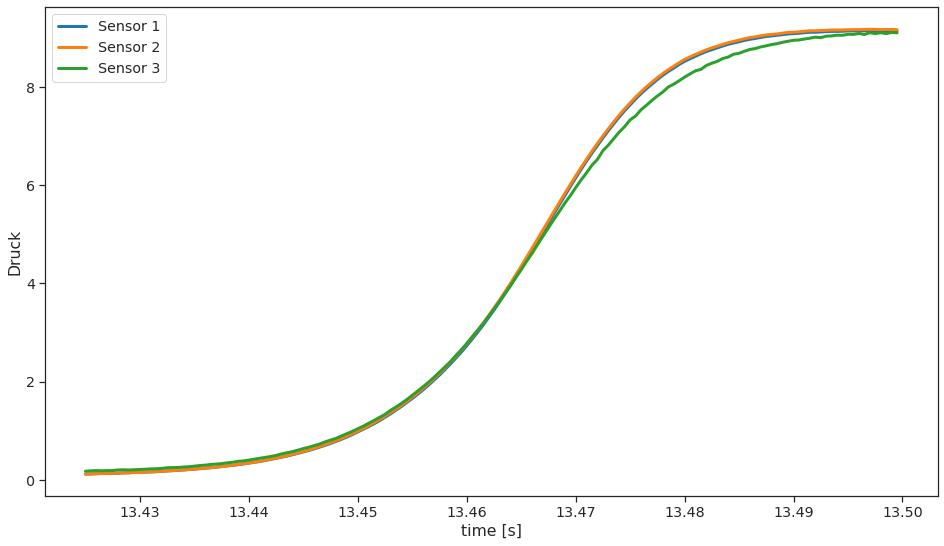

In [63]:
# Positionierung
pt=slice(26850,27000) # Zeitskala ist * 0.1s
plt.figure(figsize=(16,9))
plt.plot(time_array[pt],AIN0[pt],label='Sensor 1')
plt.plot(time_array[pt],AIN1[pt],label='Sensor 2')
plt.plot(time_array[pt],AIN2[pt]-1,label='Sensor 3')
plt.xlabel('time [s]')
plt.ylabel('Druck')
plt.legend()
plt.show()

In [41]:
#Ableitung über savitzky_golay

def savitzky_golay(y, window_size, order, deriv=0):
    """Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techhniques.
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspmydescr = dat.Extract_Datastruct()
    myrecarray=dat.Extract_Data(mydescr)ace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = list(range(order+1))
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv]
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m, y, mode='valid')

<Figure size 1152x648 with 0 Axes>

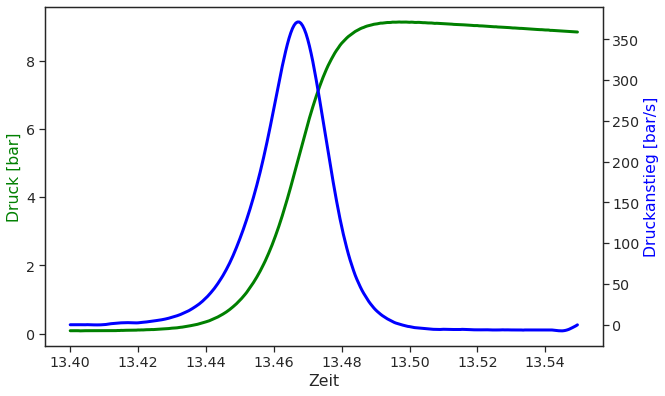

In [52]:
#Ableitung über savitzky_golay
pt=slice(26800,27100) # Zeitskala ist * 0.1s
plt.figure(figsize=(16,9))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(time_array[pt],AIN0[pt],color='g',label='Sensor 1')
ax2.plot(time_array[pt],-savitzky_golay(AIN0[pt],31,3,deriv=1)/timestep,color='b',label='savitzky_golay 31 pt window')

ax1.set_xlabel('Zeit')
ax1.set_ylabel('Druck [bar]', color='g')
ax2.set_ylabel('Druckanstieg [bar/s]', color='b')
plt.show()

In [59]:
print (np.max(-savitzky_golay(AIN0[pt],31,3,deriv=1)/timestep),np.max(-savitzky_golay(AIN1[pt],31,3,deriv=1)/timestep),np.max(-savitzky_golay(AIN2[pt],31,3,deriv=1)/timestep))

371.29181119213894 371.0162414662491 338.2280851830676


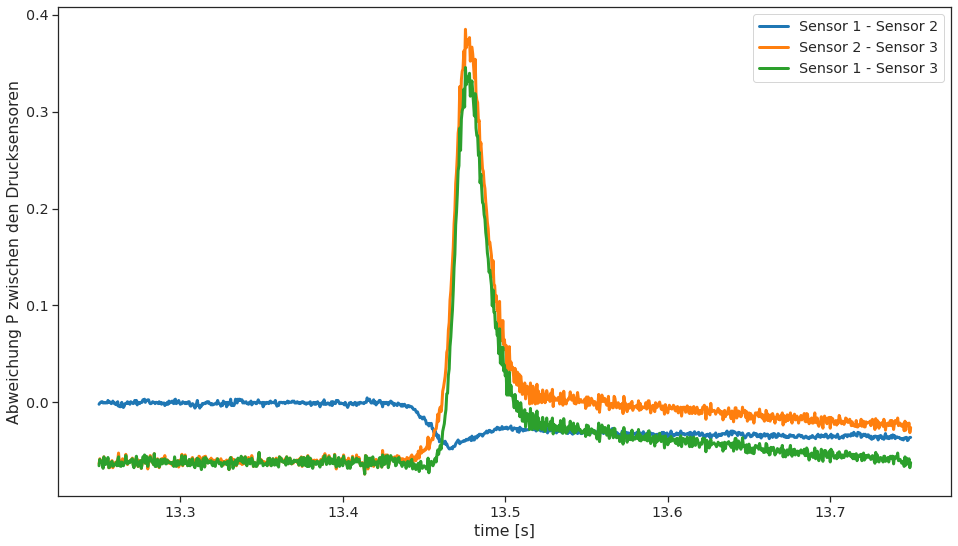

In [65]:
# Abweichung zwischen den Drucksensoren
AB_Abweichung=AIN0[pt]-AIN1[pt]
BC_Abweichung=AIN1[pt]-AIN2[pt]+1
AC_Abweichung=AIN0[pt]-AIN2[pt]+1

# Positionierung
pt=slice(26500,27500) # Zeitskala ist * 0.1s
plt.figure(figsize=(16,9))
plt.plot(time_array[pt],AB_Abweichung,label='Sensor 1 - Sensor 2')
plt.plot(time_array[pt],BC_Abweichung,label='Sensor 2 - Sensor 3')
plt.plot(time_array[pt],AC_Abweichung,label='Sensor 1 - Sensor 3')
plt.xlabel('time [s]')
plt.ylabel('Abweichung P zwischen den Drucksensoren')
plt.legend()
plt.show()

In [101]:
#Ableitung über UnivariateSpline
from scipy.interpolate import UnivariateSpline
pt=slice(26800,27100)
spl = UnivariateSpline(time_array[pt], AIN0[pt],s = 0.02,k=3)
logder = lambda x: spl.derivative()(x) # derivative of log of spline

<Figure size 1152x648 with 0 Axes>

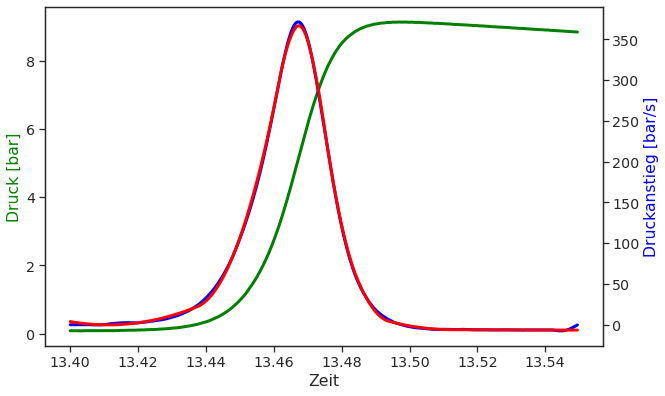

In [102]:
pt=slice(26800,27100) # Zeitskala ist * 0.1s
plt.figure(figsize=(16,9))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(time_array[pt],AIN0[pt],color='g',label='Sensor 1')
ax2.plot(time_array[pt],-savitzky_golay(AIN0[pt],31,3,deriv=1)/timestep,color='b',label='savitzky_golay 31 pt window')
ax2.plot(time_array[pt],logder(time_array[pt]),color='r',label='UnivariateSpline')

ax1.set_xlabel('Zeit')
ax1.set_ylabel('Druck [bar]', color='g')
ax2.set_ylabel('Druckanstieg [bar/s]', color='b')
plt.show()

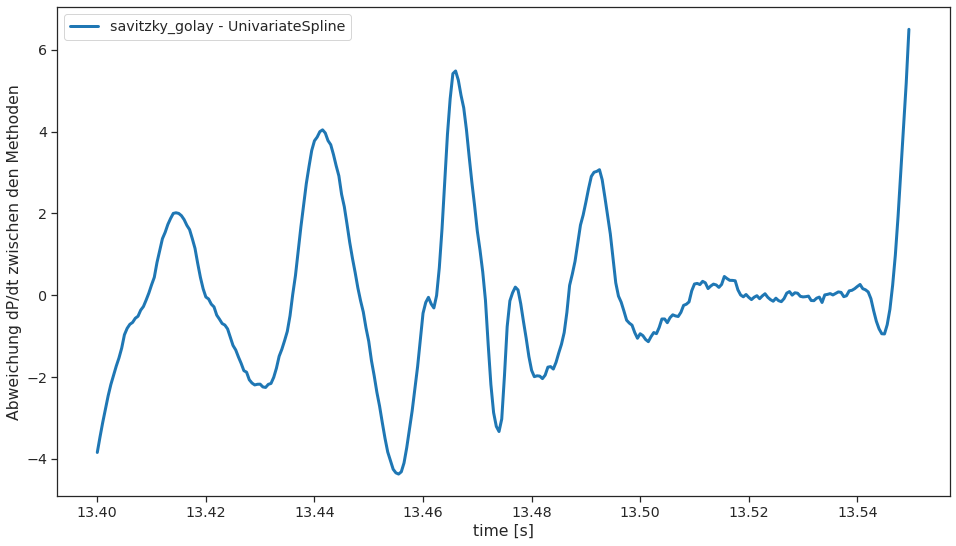

In [103]:
# Positionierung
Pdt_Abweichung=(-savitzky_golay(AIN0[pt],31,3,deriv=1)/timestep) -logder(time_array[pt])

pt=slice(26800,27100) # Zeitskala ist * 0.1s
plt.figure(figsize=(16,9))
plt.plot(time_array[pt],Pdt_Abweichung,label='savitzky_golay - UnivariateSpline')
plt.xlabel('time [s]')
plt.ylabel('Abweichung dP/dt zwischen den Methoden')
plt.legend()
plt.show()